In [ ]:
import os
import sys
import cv2
from PIL import Image
from pycocotools.coco import COCO
import urllib
import zipfile

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! unzip drive/MyDrive/NEWDATASET2.zip

Archive:  drive/MyDrive/NEWDATASET2.zip
   creating: NEWDATASET2/
   creating: NEWDATASET2/TEST/
   creating: NEWDATASET2/TEST/batik/
   creating: NEWDATASET2/TEST/batik/Batik Bali/
  inflating: NEWDATASET2/TEST/batik/Batik Bali/70.jpg  
  inflating: NEWDATASET2/TEST/batik/Batik Bali/71.jpg  
  inflating: NEWDATASET2/TEST/batik/Batik Bali/72.jpg  
  inflating: NEWDATASET2/TEST/batik/Batik Bali/73.jpg  
  inflating: NEWDATASET2/TEST/batik/Batik Bali/74.jpg  
  inflating: NEWDATASET2/TEST/batik/Batik Bali/75.jpg  
  inflating: NEWDATASET2/TEST/batik/Batik Bali/76.jpg  
  inflating: NEWDATASET2/TEST/batik/Batik Bali/77.jpg  
  inflating: NEWDATASET2/TEST/batik/Batik Bali/78.jpg  
  inflating: NEWDATASET2/TEST/batik/Batik Bali/79.jpg  
  inflating: NEWDATASET2/TEST/batik/Batik Bali/80.jpg  
  inflating: NEWDATASET2/TEST/batik/Batik Bali/81.jpg  
  inflating: NEWDATASET2/TEST/batik/Batik Bali/82.jpg  
  inflating: NEWDATASET2/TEST/batik/Batik Bali/83.jpg  
  inflating: NEWDATASET2/TEST/bati

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = 'NEWDATASET2/TRAIN/'

In [ ]:
SIZE = 224
dataset = []
label = []

In [ ]:
# Traverse through the batik directory directly
for batik_type in os.listdir(os.path.join(data_dir, 'batik')):
    # Check if it's a directory
    if os.path.isdir(os.path.join(data_dir, 'batik', batik_type)):
        # Inside each batik type directory
        for image_name in os.listdir(os.path.join(data_dir, 'batik', batik_type)):
            if image_name.endswith('.jpg'):
                image = cv2.imread(os.path.join(data_dir, 'batik', batik_type, image_name))
                if image is not None:
                    resized_image = cv2.resize(image, (SIZE, SIZE))
                    dataset.append(resized_image)
                    label.append(1)  # Assuming 1 represents the label for batik images
print(len(dataset))

1050


In [ ]:
# Traverse through the batik directory directly
tidakbatik = os.listdir(os.path.join(data_dir, 'tidak_batik'))
for i, image_name in enumerate(tidakbatik):
      if image_name.endswith('.jpg'):
        image = cv2.imread(os.path.join(data_dir, 'tidak_batik',image_name))
        if image is not None:
          resized_image = cv2.resize(image, (SIZE, SIZE))
          dataset.append(resized_image)
          label.append(0)


In [ ]:
dataset = np.array(dataset)
label = np.array(label)
print(label)
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 0)

[1 1 1 ... 0 0 0]


In [ ]:
from keras.utils import normalize

X_train = normalize(X_train, axis = 1)
X_test = normalize(X_test, axis = 1)

In [ ]:
INPUT_SHAPE = (SIZE,SIZE, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                   

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size = 32,
                    verbose = 1,
                    epochs = 10,
                    validation_data = (X_test, y_test),
                    shuffle = False
                    )

Epoch 1/10
34/34 [==============================] - 47s 1s/step - loss: 0.1761 - accuracy: 0.9425 - val_loss: 0.0737 - val_accuracy: 0.9737
Epoch 2/10
34/34 [==============================] - 43s 1s/step - loss: 0.1121 - accuracy: 0.9613 - val_loss: 0.0543 - val_accuracy: 0.9887
Epoch 3/10
34/34 [==============================] - 49s 1s/step - loss: 0.0998 - accuracy: 0.9613 - val_loss: 0.0501 - val_accuracy: 0.9887
Epoch 4/10
34/34 [==============================] - 43s 1s/step - loss: 0.0949 - accuracy: 0.9689 - val_loss: 0.0446 - val_accuracy: 0.9887
Epoch 5/10
34/34 [==============================] - 43s 1s/step - loss: 0.0725 - accuracy: 0.9717 - val_loss: 0.0525 - val_accuracy: 0.9887
Epoch 6/10
34/34 [==============================] - 44s 1s/step - loss: 0.0516 - accuracy: 0.9877 - val_loss: 0.0335 - val_accuracy: 0.9887
Epoch 7/10
34/34 [==============================] - 44s 1s/step - loss: 0.0398 - accuracy: 0.9868 - val_loss: 0.0254 - val_accuracy: 0.9925
Epoch 8/10
34/34 [==

In [ ]:
model.save('budaya_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


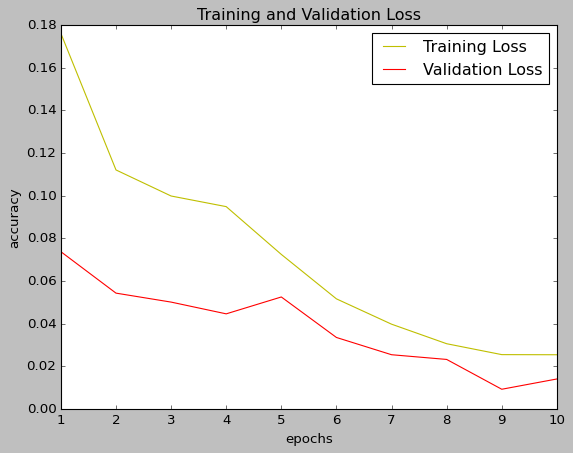

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 26ms/step
The prediction for this image is:  [[5.265005e-07]]
The actual label for this image is:  0


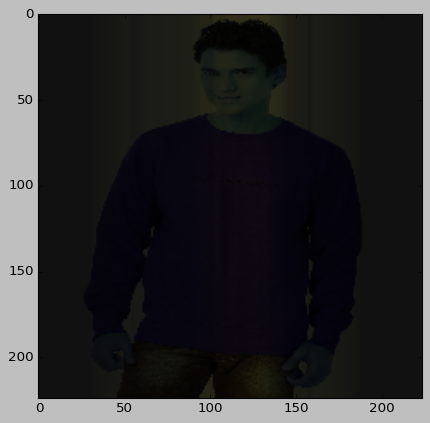

In [ ]:
import random
n = 79
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img,axis = 0)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

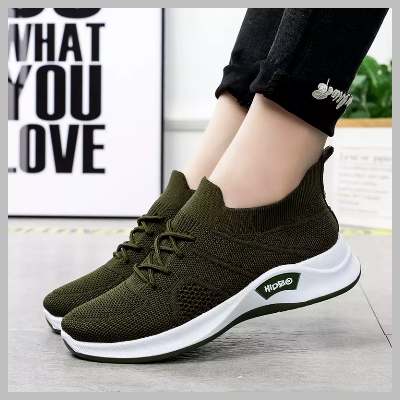

1/1 [==============================] - 0s 26ms/step
The prediction for this image is:  Batik
1/1 [==============================] - 0s 24ms/step
The prediction for this image is:  [[1.]]


In [ ]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np
import io
# Load the image from URL
url = "https://dynamic.zacdn.com/j2NPfZ4SvChxiloNZoKTra2HYk8=/filters:quality(70):format(webp)/https://static-id.zacdn.com/p/hipzo-2755-7943873-2.jpg"
response = requests.get(url)
img = Image.open(io.BytesIO(response.content))

plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()  # Display the image using matplotlib

# Preprocess the image for prediction
img = img.resize((SIZE, SIZE))  # Resize the image to match model input size
img = np.array(img)  # Convert PIL image to numpy array
img_normalized = img.astype(np.float32) / 255.0  # Normalize pixel values

input_img = np.expand_dims(img_normalized, axis=0)

# Make prediction using the model
prediction = model.predict(input_img)
predicted_label = "Batik" if prediction[0][0] > 0.5 else "Non-Batik"  # Assuming it's a binary classification task

print("The prediction for this image is: ", predicted_label)
print("The prediction for this image is: ", model.predict(input_img))
# print("The actual label for this image is: ", y_test[n])
# No y_test[n] available


In [ ]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")


9/9 [==============================] - 3s 287ms/step - loss: 0.0141 - accuracy: 0.9925
Accuracy =  99.24812316894531 %


In [ ]:
for class_image in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,class_image)):
    print(image)
    image_path = os.path.join(data_dir, class_image, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('image not in ext list {}' .format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('issue with image {}' .format(image_path))

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size = (224,224)
batch_size = 32

train_ds = image_dataset_from_directory(
    "NEWDATASET2/TRAIN",
    labels = "inferred",
    label_mode = 'int',
    validation_split = 0.2,
    subset = "training",
    seed = 1337,
    image_size = image_size,
    batch_size = batch_size,
)
val_ds = image_dataset_from_directory(
    "NEWDATASET2/TRAIN",
    labels = "inferred",
    label_mode = 'int',
    validation_split = 0.2,
    subset = "validation",
    seed = 1337,
    image_size = image_size,
    batch_size = batch_size,
)

In [ ]:
test_ds = image_dataset_from_directory(
    "NEWDATASET2/TEST",
    labels = "inferred",
    label_mode = 'int',
    seed = 1337,
    image_size = image_size,
    batch_size = batch_size,
)

In [ ]:
#visualizing the data
plt.figure(figsize = (10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")